In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import seaborn as sns

In [4]:
Name="Heart_wCatFeatures.csv"
path="/home/samsung-ub/Desktop/Pyhton/Datasets/"
dataNameandPath = os.path.join("r",path, Name)
df = pd.read_csv("../Datasets/"+Name)
df.shape

(303, 23)

In [5]:
features=df.columns.tolist()
x = df.loc[:, features].values
y = df.loc[:, "target"].values

## Standardize features by removing the mean and scaling to unit variance

In [6]:
xS = StandardScaler().fit_transform(x)

## PCA with 2 components

In [8]:
pca = PCA(n_components=2)
X_wPCA_2 = pca.fit_transform(xS)
X_approx_2 = pca.inverse_transform(X_wPCA_2)
print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(pca)

[0.22833166 0.07905451]
2
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [9]:
print("Principal Components Shape", pca.components_.shape)
print("original shape:   ", xS.shape)
print("transformed shape:", X_wPCA_2.shape)
print("Inverse - transformed shape:",X_approx_2.shape)

Principal Components Shape (2, 23)
original shape:    (303, 23)
transformed shape: (303, 2)
Inverse - transformed shape: (303, 23)


In [10]:
principalDf = pd.DataFrame(data = X_wPCA_2
             , columns = ['PC_1', 'PC_2'])
principalDf

,PC_1,PC_2
0,0.084161,2.976310
1,-2.109573,1.094655
2,-3.386110,-0.412714
3,-3.225759,-1.085305
4,-1.657995,0.205842
...,...,...
298,2.813615,-0.337088
299,1.664545,-0.661107
300,3.663477,0.270013
301,3.450126,-1.439604


In [11]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,PC_1,PC_2,target
0,0.084161,2.976310,1
1,-2.109573,1.094655,1
2,-3.386110,-0.412714,1
3,-3.225759,-1.085305,1
4,-1.657995,0.205842,1


In [12]:
xx=finalDf["PC_1"]
yy=finalDf["PC_2"]
labels = finalDf["target"]
#labels=labels.astype(int)
xxp=xx[labels==1]
yyp=yy[labels==1]
xxz=xx[labels==0]
yyz=yy[labels==0]

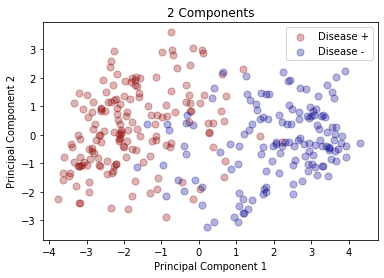

In [15]:
sns.regplot(xxp, yyp, fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":50} )
sns.regplot(xxz, yyz, fit_reg=False, scatter_kws={"color":"darkblue","alpha":0.3,"s":50} )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
title="2 Components"
plt.title(title)
plt.legend(["Disease +", "Disease -"])
plt.show()

## PCA with predefined variance ratio

In [22]:
pcaVarDef = PCA(.99)
X_wPCA = pcaVarDef.fit_transform(xS)

In [23]:
print(pcaVarDef)
print(pcaVarDef.explained_variance_ratio_)
print(pcaVarDef.n_components_)
print(X_wPCA.shape)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[0.22833166 0.07905451 0.07115047 0.0652904  0.05928106 0.05356596
 0.05284083 0.04752287 0.04450721 0.04168542 0.03902156 0.0350721
 0.0340558  0.03181292 0.02928879 0.02527423 0.02229347 0.01780796
 0.01749897]
19
(303, 19)


In [24]:
X_approx = pcaVarDef.inverse_transform(X_wPCA)

In [25]:
print("Principal Components Shape", pcaVarDef.components_.shape)
print("original shape:   ", xS.shape)
print("transformed shape:", X_wPCA.shape)
print("Inverse - transformed shape:",X_approx.shape)
"""
The main purpose of PCA is dimension reduction.
Inverse transormation takes princ compts to
original dimension. 
So inverse transormation is used in image noise reduction
"""

Principal Components Shape (19, 23)
original shape:    (303, 23)
transformed shape: (303, 19)
Inverse - transformed shape: (303, 23)


'\nThe main purpose of PCA is dimension reduction.\nInverse transormation takes princ compts to\noriginal dimension. \nSo inverse transormation is used in image noise reduction\n'

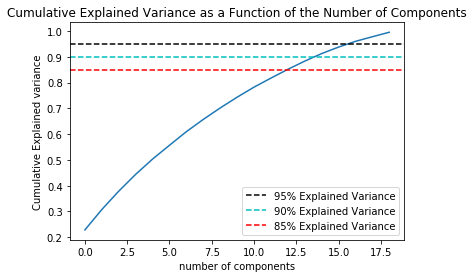

In [26]:
plt.plot(np.cumsum(pcaVarDef.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative Explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')

plt.axhline(y = .95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = .90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')

In [112]:
list=[]
for i in range(0,X_wPCA.shape[1]):
    colN="PC_"+str(i+1)
    list.append(colN)
    print(colN)

PC_1
PC_2
PC_3
PC_4
PC_5
PC_6
PC_7
PC_8
PC_9
PC_10
PC_11
PC_12
PC_13
PC_14
PC_15
PC_16
PC_17
PC_18
PC_19


In [117]:
df1 = pd.DataFrame(data = X_wPCA
             , columns = list)
df_final = pd.concat([df1, df[['target']]], axis = 1)

df_final.columns
    

Index(['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9',
       'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17',
       'PC_18', 'PC_19', 'target'],
      dtype='object')

In [118]:
Name="Heart19featureAfterPCA.csv"
path="/home/samsung-ub/Desktop/Pyhton/Datasets/"
toWrite = os.path.join("r",path, Name)
df_final.to_csv(toWrite)